In [1]:
import xarray as xr
import numpy as np
import rioxarray as rxr
import cartopy.crs as ccrs
from pyproj import CRS
import contextily as cx
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
font_size = 17
rcParams['axes.titlesize'] = font_size
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size
rcParams['figure.titleweight'] = 'bold'

In [3]:
ds = xr.open_dataset('../data/CarbonMapper/Loma_Los_Colorados/EMIT_L3B_001_20230111T130107_2301108_002_plume0.nc', decode_coords='all')
ds_l2 = xr.open_dataset('../data/CarbonMapper/Loma_Los_Colorados/EMIT_L2B_001_20230111T130107_2301108_002.nc', decode_coords='all')
ds_cm = xr.open_dataset('../data/CarbonMapper/Loma_Los_Colorados/carbonmapper_20230111.tif')

In [4]:
ch4_plume = ds['ch4'].dropna(dim='x', how='all').dropna(dim='y', how='all')

lon_min = ch4_plume.longitude.min()
lon_max = ch4_plume.longitude.max()
lat_min = ch4_plume.latitude.min()
lat_max = ch4_plume.latitude.max()

x_min = ch4_plume.x.min().item()
x_max = ch4_plume.x.max().item()
y_min = ch4_plume.y.min().item()
y_max = ch4_plume.y.max().item()

/Users/xinz/miniconda3/envs/hyperch4/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


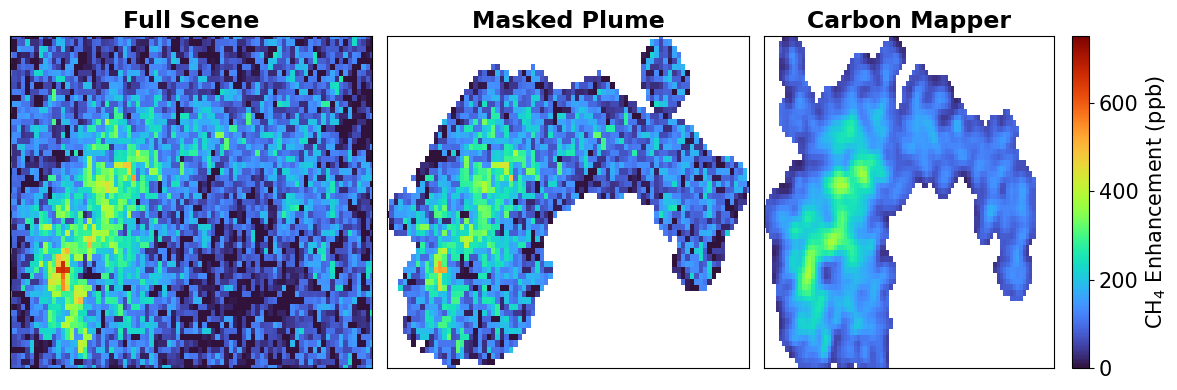

In [5]:
# fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12, 4))
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs = axs.flatten()

ds_l2['ch4'].plot(ax = axs[0], x='x', y='y', vmin=0, vmax=6000*0.125, cmap='turbo', add_colorbar=False)
m = ds['ch4'].plot(ax = axs[1], x='x', y='y', vmin=0, vmax=6000*0.125, cmap='turbo', add_colorbar=False)
ds_cm['band_data'].transpose(..., 'band').astype(int).plot.imshow(ax=axs[2])

plt.colorbar(m, ax=axs[2], label='CH$_4$ Enhancement (ppb)')

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks([])
    ax.set_xticks([])

axs[0].set_title('Full Scene')
axs[1].set_title('Masked Plume')
axs[2].set_title('Carbon Mapper')

fig.tight_layout()

/Users/xinz/miniconda3/envs/hyperch4/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


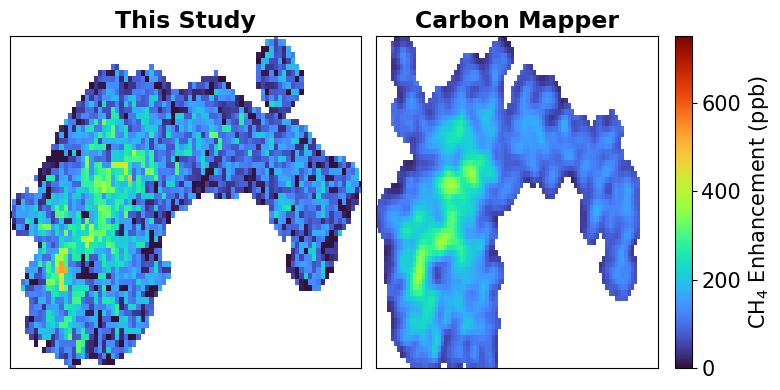

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

axs = axs.flatten()

m = ds['ch4'].plot(ax = axs[0], x='x', y='y', vmin=0, vmax=6000*0.125, cmap='turbo', add_colorbar=False, rasterized=True)
ds_cm['band_data'].transpose(..., 'band').astype(int).plot.imshow(ax=axs[1], rasterized=True)

plt.colorbar(m, ax=axs[1], label='CH$_4$ Enhancement (ppb)')

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks([])
    ax.set_xticks([])

axs[0].set_title('This Study')
axs[1].set_title('Carbon Mapper')

fig.tight_layout()
# fig.savefig('../figures/comp_carbonmapper.pdf')

/Users/xinz/miniconda3/envs/hyperch4/lib/python3.11/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/Users/xinz/miniconda3/envs/hyperch4/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


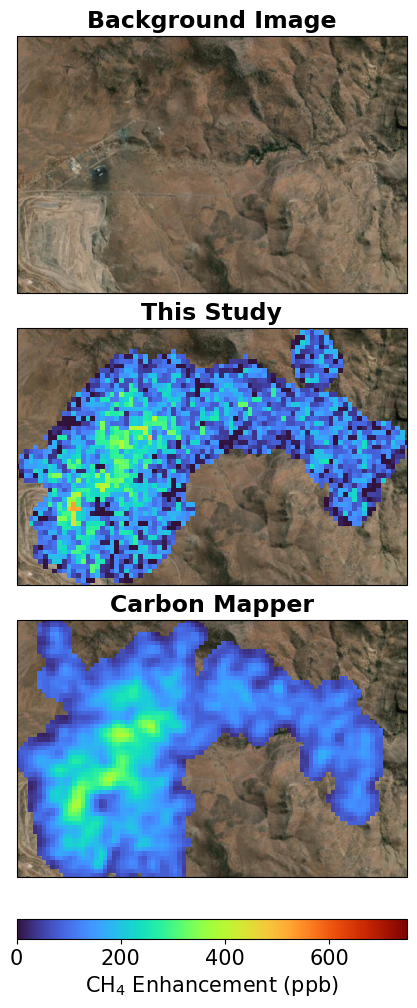

In [7]:
utm_zone = CRS.from_epsg(ds.rio.crs.to_epsg()).to_dict()['zone']
crs = ccrs.UTM(zone=utm_zone, southern_hemisphere=True)

fig, axs = plt.subplots(nrows=3, figsize=(5, 10),
                        subplot_kw={'projection': crs},
                        layout='compressed',
                        )

axs = axs.flatten()

for ax in axs:
    ax.set_extent((x_min, x_max, y_min, y_max), crs=crs)
    # add high-res background
    cx.add_basemap(ax, crs=crs, source=cx.providers.Esri.WorldImagery)
    # remove watermark
    ax.texts[0].remove()

m = ds['ch4'].plot(ax = axs[1], x='x', y='y', vmin=0, vmax=6000*0.125, cmap='turbo', add_colorbar=False, rasterized=True)
ds_cm['band_data'].transpose(..., 'band').astype(int).plot.imshow(ax=axs[2], rasterized=True)

for ax in axs:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks([])
    ax.set_xticks([])
    # gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    #                 linewidth=0.2, color='w', alpha=0.5, linestyle='--')

fig.colorbar(m, ax=axs, label='CH$_4$ Enhancement (ppb)', orientation='horizontal')

axs[0].set_title('Background Image')
axs[1].set_title('This Study')
axs[2].set_title('Carbon Mapper')

fig.savefig('../figures/comp_carbonmapper.pdf', bbox_inches='tight')